# 오토 인코더 실습

### 랜덤 시드 설정

In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

### 데이터 불러오기

In [4]:
from tensorflow.keras import datasets
(X_tn0, y_tn0), (X_te0, y_te0) = datasets.mnist.load_data()

### 오리지널 데이터 차원 확인

In [5]:
print(X_tn0.shape)
print(y_tn0.shape)
print(X_te0.shape)
print(y_te0.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 오리지널 데이터 시각화

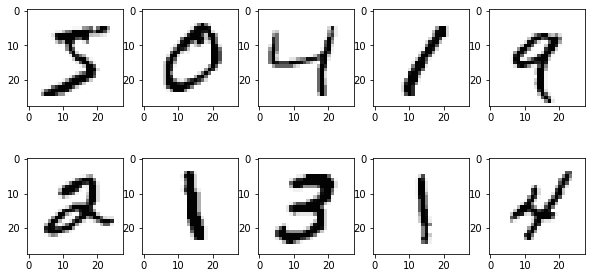

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn0[i].reshape((28, 28)),
              cmap='Greys')
plt.show()

### 피처 데이터 스케일 조정

In [9]:
X_tn_re = X_tn0.reshape(60000, 28, 28, 1)
X_tn = X_tn_re/255
print(X_tn.shape)
X_te_re = X_te0.reshape(10000, 28, 28, 1)
X_te = X_te_re/255
print(X_te.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### 노이즈 피처 데이터

In [11]:
import numpy as np
X_tn_noise = X_tn + np.random.uniform(-1, 1, size=X_tn.shape)
X_te_noise = X_te + np.random.uniform(-1, 1, size=X_te.shape)

### 노이즈 데이터 스케일링

In [12]:
X_tn_ns = np.clip(X_tn_noise, a_min=0, a_max=1)
X_te_ns = np.clip(X_te_noise, a_min=0, a_max=1)

### 노이즈 데이터 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

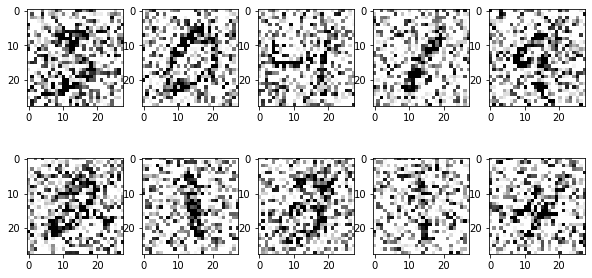

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn_ns[i].reshape((28, 28)),
              cmap='Greys')
plt.show

### 인코더 모형 생성

In [14]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Activation

# 인코더
input_layer1 = Input(shape=(28, 28, 1))
x1 = Conv2D(20, kernel_size=(5,5),
           padding='same')(input_layer1)
x1 = Activation(activation='relu')(x1)
output_layer1 = MaxPool2D(pool_size=2,
                         padding='same')(x1)
encoder = Model(input_layer1, output_layer1)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________


### 인코더 아웃풋 차원 확인

In [16]:
print(output_layer1.shape)
print(output_layer1.shape[0])
print(output_layer1.shape[1])
print(output_layer1.shape[2])
print(output_layer1.shape[3])

(None, 14, 14, 20)
None
14
14
20


### 디코더 모형 생성

In [18]:
input_layer2 = Input(shape=output_layer1.shape[1:4])
X2 = Conv2D(10, kernel_size=(5, 5),
           padding='same')(input_layer2)
X2 = Activation(activation='relu')(X2)
X2 = UpSampling2D()(X2)
X2 = Conv2D(1, kernel_size=(5, 5),
           padding='same')(X2)
output_layer2 = Activation(activation='relu')(X2)
decoder = Model(input_layer2, output_layer2)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14, 14, 20)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 10)        5010      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 10)        0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 28, 28, 10)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 1)         251       
                                                                 
 activation_2 (Activation)   (None, 28, 28, 1)         0         
                                                           

### 오토 인코더 모형 생성

In [20]:
input_auto = Input(shape=(28, 28, 1))
output_auto = decoder(encoder(input_auto))
auto_encoder = Model(input_auto, output_auto)
auto_encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 14, 14, 20)        520       
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         5261      
                                                                 
Total params: 5,781
Trainable params: 5,781
Non-trainable params: 0
_________________________________________________________________


### 모형 컴파일

In [21]:
auto_encoder.compile(loss='mean_squared_error',
                    optimizer='adam',
                    metrics=['mean_squared_error'])

### 학습

In [23]:
hist = auto_encoder.fit(X_tn_ns, X_tn,
                epochs=1,
                batch_size=100)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
600/600 [==============================] - 38s 62ms/step - loss: 0.0281 - mean_squared_error: 0.0281


### 예측값

In [24]:
# 노이즈 데이터
X_pred = auto_encoder.predict(X_tn_ns)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


### 오토 인코딩 데이터 시각화

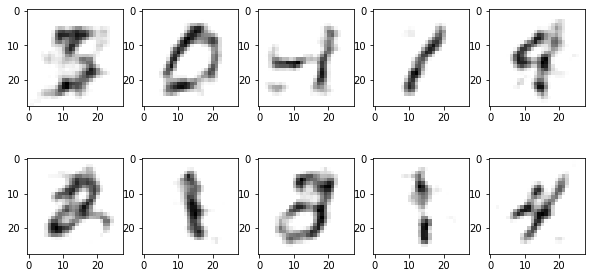

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for i in range(2*5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_pred[i].reshape((28, 28)),
              cmap='Greys')
plt.show()